In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


In [8]:
data = pd.read_csv('chess_games.csv')
data.head(2)

,Event,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,AN
0,Classical,eisaaaa,HAMID449,1-0,2016.06.30,22:00:01,1901,1896,11.0,-11.0,D10,Slav Defense,300+5,Time forfeit,1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e...
1,Blitz,go4jas,Sergei1973,0-1,2016.06.30,22:00:01,1641,1627,-11.0,12.0,C20,King's Pawn Opening: 2.b3,300+0,Normal,1. e4 e5 2. b3 Nf6 3. Bb2 Nc6 4. Nf3 d6 5. d3 ...


In [ ]:
data['Result'].hist()

In [ ]:
columns_to_drop = ['White', 'Black', 'UTCDate', 'UTCTime', 'TimeControl', 'Termination','Opening', 'AN']
data = data.drop(columns=columns_to_drop)


In [13]:
columns_to_drop = ['ECO']
data = data.drop(columns=columns_to_drop)
data.head(2)

KeyError: "['ECO'] not found in axis"

<Axes: >

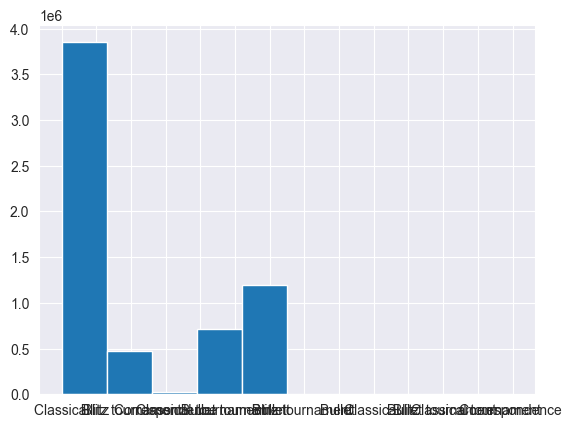

In [14]:
data['Event'].hist()

In [16]:
# Replace 'event_column' with the actual column name you want to analyze
event_counts = data['Event'].value_counts()

# Print the counts of unique values
print(event_counts)

Event
 Blitz                    2339554
 Classical                1510798
 Bullet                   1198177
 Bullet tournament         546774
 Blitz tournament          472258
 Classical tournament      165633
 Correspondence             22939
Blitz                          20
Classical                      13
Bullet                          8
Blitz tournament                4
Bullet tournament               3
Classical tournament            2
Correspondence                  1
Name: count, dtype: int64


In [17]:
# Normalize the event names by stripping leading/trailing spaces and converting to lowercase
data['Event'] = data['Event'].str.strip().str.lower()
# Count unique values in the 'Event' column
event_counts = data['Event'].value_counts()

# Print the counts of unique values
print(event_counts)

Event
blitz                   2339574
classical               1510811
bullet                  1198185
bullet tournament        546777
blitz tournament         472262
classical tournament     165635
correspondence            22940
Name: count, dtype: int64


In [18]:
data.head(2)

,Event,Result,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff
0,classical,1-0,1901,1896,11.0,-11.0
1,blitz,0-1,1641,1627,-11.0,12.0


In [19]:
# Convert 'Result' column to numerical values
result_mapping = {'1-0': 1, '0-1': 0, '1/2-1/2': 0.5}
data['Result'] = data['Result'].map(result_mapping)

# Optionally, convert 'Event' column to numerical values using one-hot encoding
data = pd.get_dummies(data, columns=['Event'])

In [20]:
# Calculate the correlation matrix
corr = data.corr(method='pearson')

<Axes: >

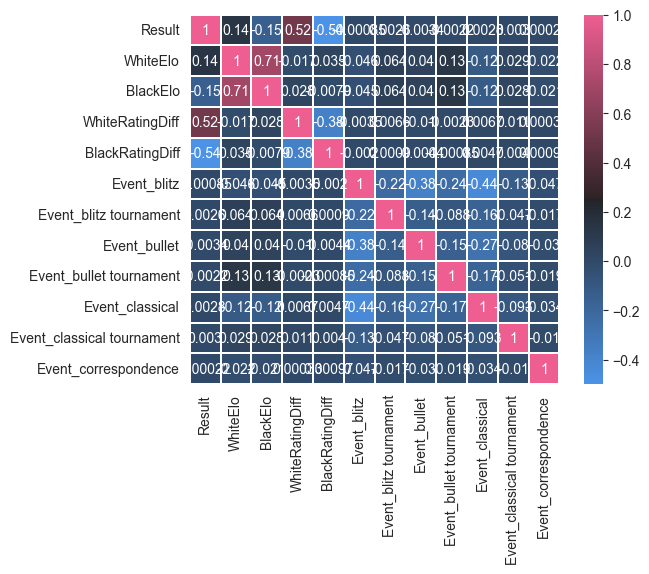

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a custom color palette
cmap = sns.diverging_palette(250, 354, 80, 60, center='dark', as_cmap=True)

# Plot the heatmap
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidth=.2, annot=True)
